<a href="https://colab.research.google.com/github/raypratik9/Ola-Driver-Attrition-Rate/blob/main/ola_driver_Rate_of_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
!pip install pandasql
!pip install imblearn

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:01<00:00, 853kB/s]
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=f281cb72183e090637e1d550facb9e71b2e4ec7b28292ed96406f9c6f2dcc2a8
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [ ]:
df=pd.read_csv('ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df['Quarterly Rating'].unique()

array([2, 1, 4, 3])

In [ ]:
df['Grade'].unique()

array([1, 2, 3, 4, 5])

### Checking for null values

In [ ]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### converting string to datetime format

In [ ]:
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])

In [ ]:
x=df.groupby('Driver_ID').agg({'Quarterly Rating':'mean','Age':'max','MMM-YY':'count','Total Business Value':'sum','Dateofjoining':'max','Gender':'min','Education_Level':'mean','Income':'mean','Grade':'mean','City':'max'}).round(0)
x.reset_index(drop=True,inplace=True)

In [ ]:
x['LastWorkingDate']=df.groupby('Driver_ID')['LastWorkingDate']

In [ ]:
def func(x):
  for i in x[1]:
    if not pd.isnull(i):
      return i

In [ ]:
x['LastWorkingDate'].isnull().sum()

0

In [ ]:
x['LastWorkingDate']=x['LastWorkingDate'].apply(lambda x:func(x))

In [ ]:
x.isnull().sum()

Quarterly Rating          0
Age                       0
MMM-YY                    0
Total Business Value      0
Dateofjoining             0
Gender                    0
Education_Level           0
Income                    0
Grade                     0
City                      0
LastWorkingDate         765
dtype: int64

Feature Engg

In [ ]:
def func(x):
  if pd.isnull(x):
    return 0
  else:
    return 1

In [ ]:
x['target']=x['LastWorkingDate'].apply(lambda x:func(x) )

In [ ]:
x['total_working_day']=(x['LastWorkingDate'] - x['Dateofjoining']).dt.days

In [ ]:
x.drop(columns=['Dateofjoining','LastWorkingDate'],inplace=True)

In [ ]:
temp=x.groupby('City').agg({'target':'sum'}).reset_index()

In [ ]:
temp.head()

,City,target
0,C1,56
1,C10,61
2,C11,45
3,C12,53
4,C13,58


In [ ]:
temp=temp.set_index(['City']).to_dict()

In [ ]:
def func(x,temp):
  return temp[x]


In [ ]:
x['City']=x['City'].apply(lambda x:func(x,temp['target']))

In [ ]:
x.head()

,Quarterly Rating,Age,MMM-YY,Total Business Value,Gender,Education_Level,Income,Grade,City,target,total_working_day
0,2.0,28.0,3,1715580,0.0,2.0,57387.0,1.0,57,1,77.0
1,1.0,31.0,2,0,0.0,2.0,67016.0,2.0,52,0,NaN
2,1.0,43.0,5,350000,0.0,2.0,65603.0,2.0,58,1,142.0
3,1.0,29.0,3,120360,0.0,0.0,46368.0,1.0,53,1,57.0
4,2.0,31.0,5,1265000,1.0,1.0,78728.0,3.0,45,0,NaN


### KNN Imputer

In [ ]:
temp=x.copy()

In [ ]:
X=temp.loc[:,~temp.columns.isin(['target'])]
y=temp['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()

imputer = KNNImputer(n_neighbors=2)

X_scaled = scaler.fit_transform(X)

X_scaled_imputed = imputer.fit_transform(X_scaled)

In [ ]:
X_scaled_imputed

array([[ 0.57212957, -0.94668243, -0.74069553, ..., -1.15831723,
        -0.04911899, -0.61560196],
       [-0.76865834, -0.44518787, -0.88814106, ..., -0.08434787,
        -0.38024105, -0.57281733],
       [-0.76865834,  1.56079034, -0.44580446, ..., -0.08434787,
         0.01710542, -0.47298654],
       ...,
       [ 0.57212957,  1.89512005,  0.14397769, ..., -0.08434787,
        -1.1087096 ,  0.13258048],
       [ 0.57212957, -0.94668243, -0.29835892, ..., -1.15831723,
         3.52699931, -0.05172253],
       [ 0.57212957, -0.61235272, -0.15091338, ..., -0.08434787,
         0.14955425, -0.14387403]])

In [ ]:
X=pd.DataFrame(X_scaled_imputed)

In [ ]:
x.columns

Index(['Quarterly Rating', 'Age', 'MMM-YY', 'Total Business Value', 'Gender',
       'Education_Level', 'Income', 'Grade', 'City', 'target',
       'total_working_day'],
      dtype='object')

In [ ]:
X.columns=['Quarterly Rating', 'Age', 'MMM-YY', 'Total Business Value', 'Gender',
       'Education_Level', 'Income', 'Grade', 'City',
       'total_working_day']

In [ ]:
df=X.copy()

In [ ]:
df.head()

,Quarterly Rating,Age,MMM-YY,Total Business Value,Gender,Education_Level,Income,Grade,City,total_working_day
0,0.572130,-0.946682,-0.740696,-0.314641,-0.834188,1.216049,-0.065229,-1.158317,-0.049119,-0.615602
1,-0.768658,-0.445188,-0.888141,-0.502646,-0.834188,1.216049,0.275112,-0.084348,-0.380241,-0.572817
2,-0.768658,1.560790,-0.445804,-0.464290,-0.834188,1.216049,0.225169,-0.084348,0.017105,-0.472987
3,-0.768658,-0.779518,-0.740696,-0.489456,-0.834188,-1.234575,-0.454699,-1.158317,-0.314017,-0.659484
4,0.572130,-0.445188,-0.445804,-0.364019,1.198771,-0.009263,0.689076,0.989621,-0.843812,-0.431299


In [ ]:
df.isnull().sum()

Quarterly Rating        0
Age                     0
MMM-YY                  0
Total Business Value    0
Gender                  0
Education_Level         0
Income                  0
Grade                   0
City                    0
total_working_day       0
dtype: int64

In [ ]:
df['target']=y

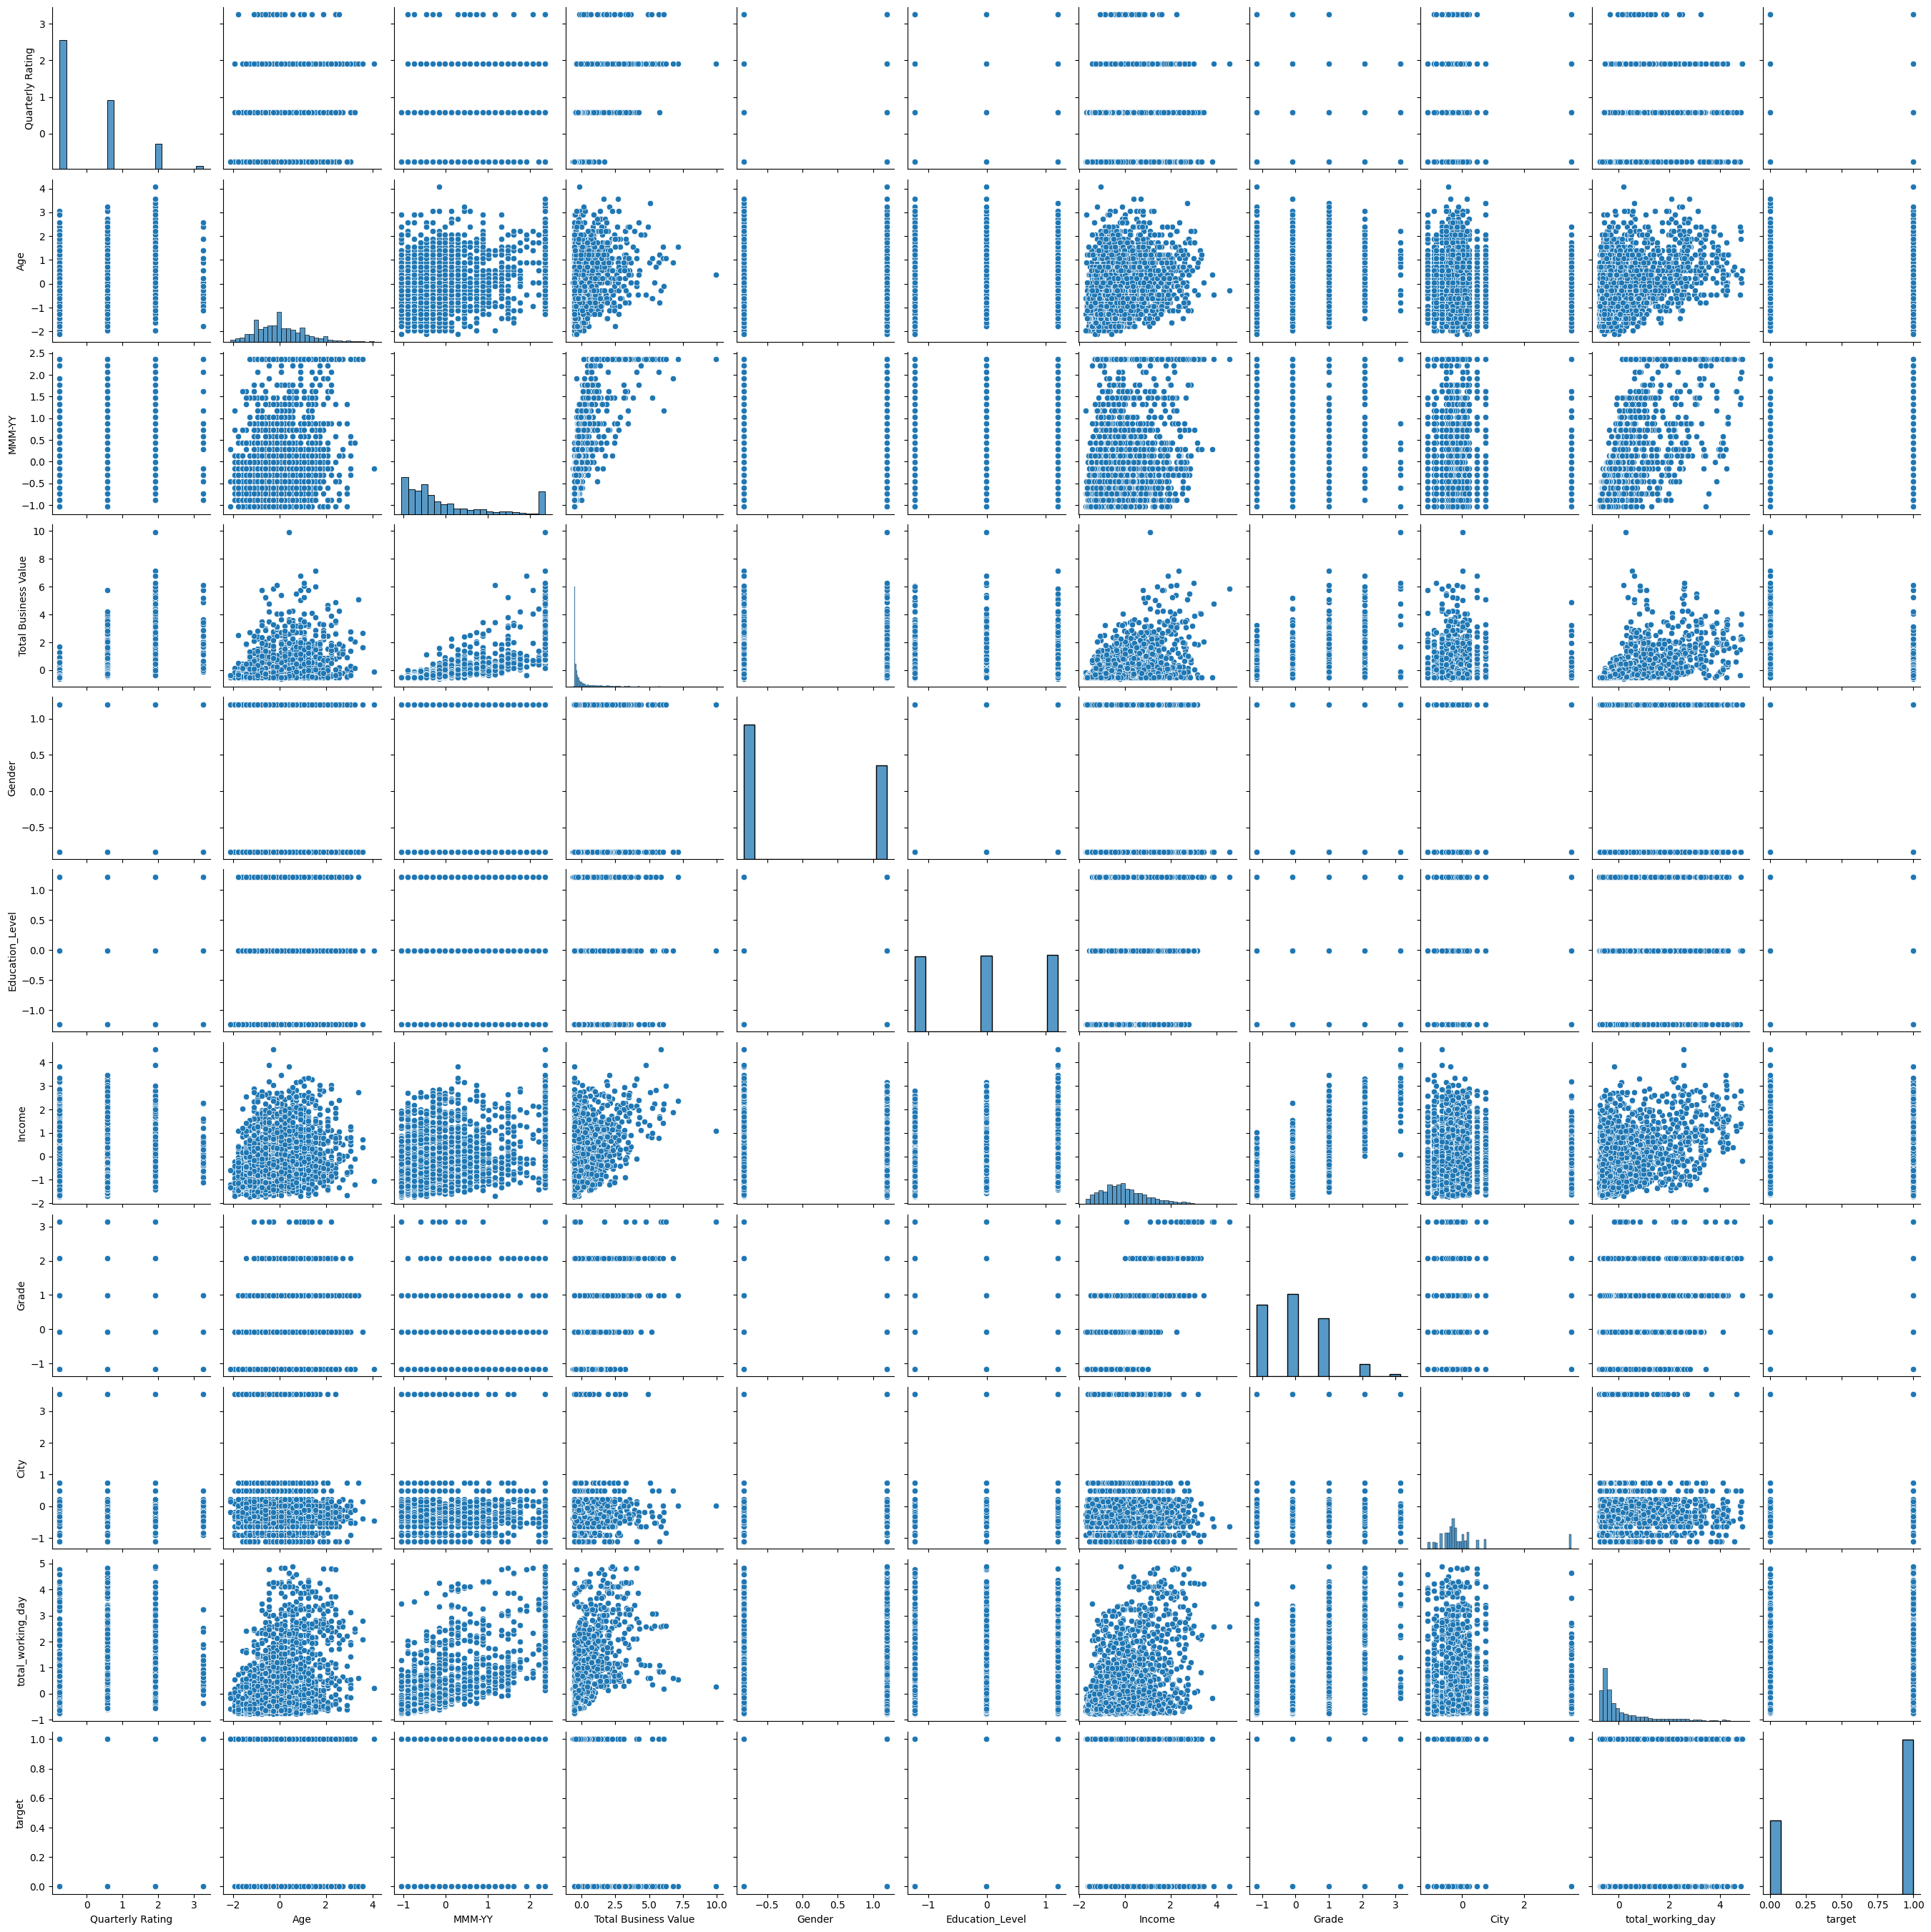

In [ ]:
sns.pairplot(data=df)

### Multivariate Analysis

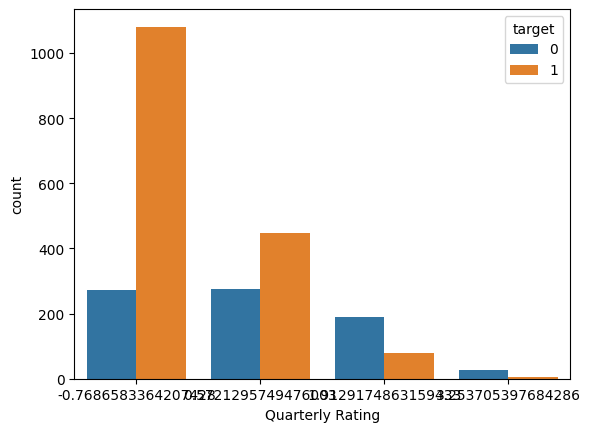

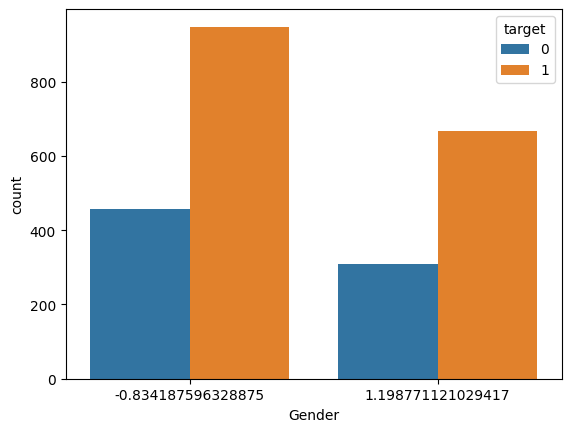

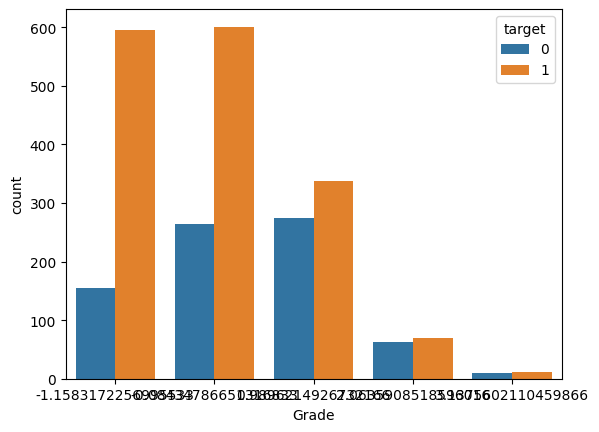

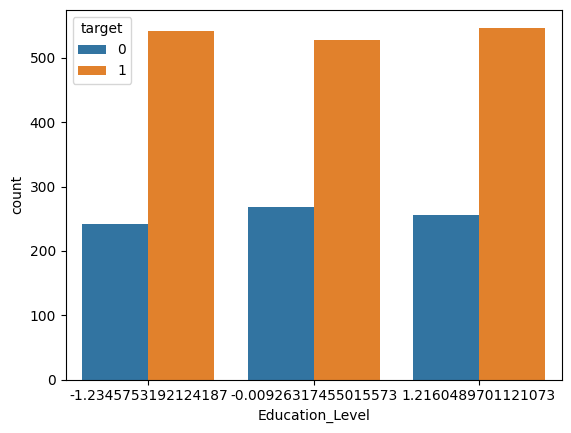

In [ ]:
for i in ['Quarterly Rating','Gender','Grade','Education_Level']:
  sns.countplot(data=df,x=i,hue='target')
  plt.show()

<Axes: xlabel='Age', ylabel='Count'>

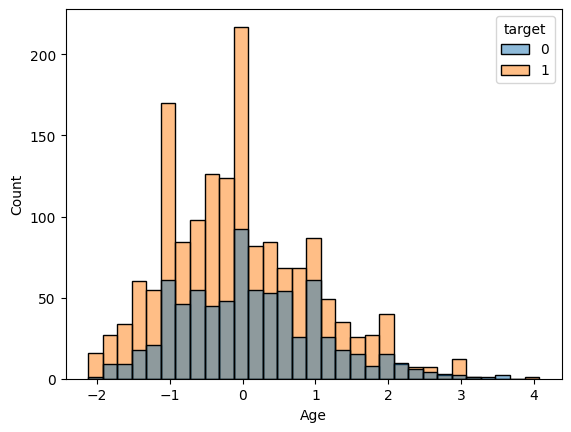

In [ ]:
sns.histplot(data=df, x="Age",hue='target')

### Checking for outliers

<Axes: >

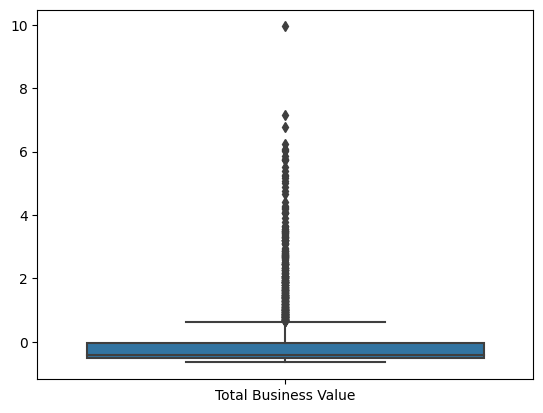

In [ ]:
sns.boxplot(data=df[['Total Business Value']])

<Axes: >

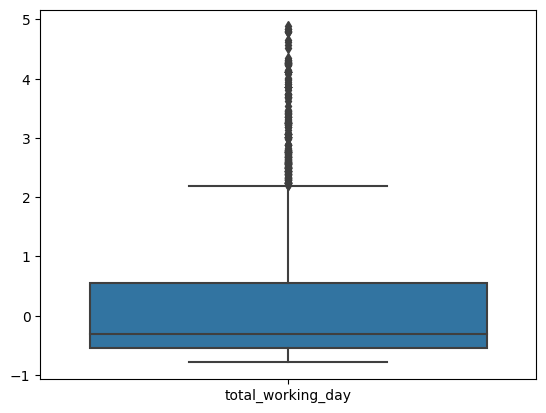

In [ ]:
sns.boxplot(data=df[['total_working_day']])

<Axes: >

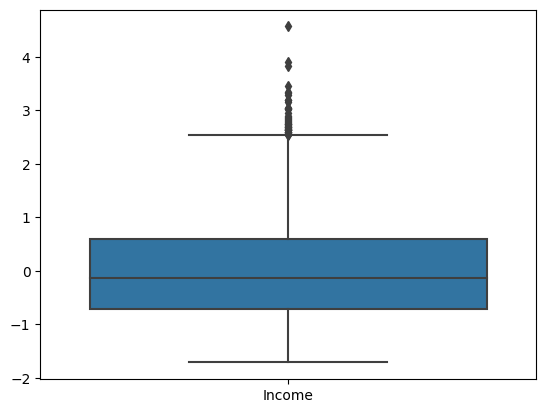

In [ ]:
sns.boxplot(data=df[['Income']])

### Treating outliers

In [ ]:
num_columns=['Income','total_working_day','Total Business Value']
for i in num_columns:
    q25=df[i].quantile(0.25)
    q75=df[i].quantile(0.75)

    IQR = q75-q25

    df = df[-((df[i] < (q25 - 1.5 * IQR)) | (df[i] > (q75 + 1.5 * IQR)))]
    df = df.reset_index(drop=True)

<Axes: >

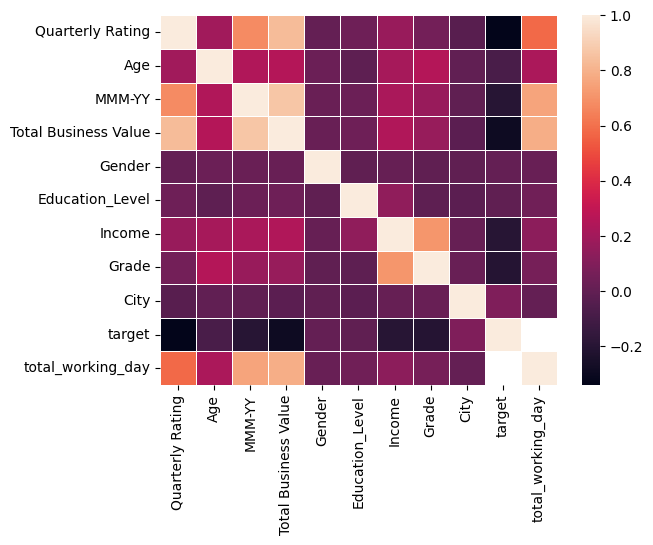

In [ ]:
sns.heatmap(x.corr(method='spearman'),  linewidths=.5)

### Checking for multicollinearity

In [ ]:
vif = pd.DataFrame()
vif['Features'] =df.columns
vif['VIF'] =[variance_inflation_factor(df.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,Quarterly Rating,1.96
1,Age,1.11
2,MMM-YY,3.95
3,Total Business Value,9.37
4,Gender,1.00
5,Education_Level,1.05
6,Income,2.02
7,Grade,2.03
8,City,1.01
9,total_working_day,1.78


In [ ]:
X

,Quarterly Rating,Age,MMM-YY,Total Business Value,Gender,Education_Level,Income,Grade,City,total_working_day
0,0.572130,-0.946682,-0.740696,-0.314641,-0.834188,1.216049,-0.065229,-1.158317,-0.049119,-0.615602
1,-0.768658,-0.445188,-0.888141,-0.502646,-0.834188,1.216049,0.275112,-0.084348,-0.380241,-0.572817
2,-0.768658,1.560790,-0.445804,-0.464290,-0.834188,1.216049,0.225169,-0.084348,0.017105,-0.472987
3,-0.768658,-0.779518,-0.740696,-0.489456,-0.834188,-1.234575,-0.454699,-1.158317,-0.314017,-0.659484
4,0.572130,-0.445188,-0.445804,-0.364019,1.198771,-0.009263,0.689076,0.989621,-0.843812,-0.431299
...,...,...,...,...,...,...,...,...,...,...
2376,1.912917,0.056307,2.355661,1.880735,-0.834188,-1.234575,0.833533,0.989621,-0.446465,1.783628
2377,-0.768658,0.056307,-0.740696,-0.502646,1.198771,-1.234575,-1.665736,-1.158317,-0.314017,-0.650707
2378,0.572130,1.895120,0.143978,-0.194149,-0.834188,-1.234575,-0.843427,-0.084348,-1.108710,0.132580
2379,0.572130,-0.946682,-0.298359,-0.395489,1.198771,1.216049,0.362839,-1.158317,3.526999,-0.051723


### Upsampling minority class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
print(pd.Series(y_res).value_counts())

1    1616
0    1616
Name: target, dtype: int64


In [ ]:
X_res.shape

(3232, 10)

### Hyperparameter Tuning(Bagging and boosting)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100,150,200],
    'max_depth': [None, 10,15, 20,25, 30],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest classifier
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X, y)

# Print best parameters
print(grid_search.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
best_params=grid_search.best_params_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
optimal_rf = RandomForestClassifier(max_depth= 15, min_samples_leaf= 2, min_samples_split=10, n_estimators=200)
optimal_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [ ]:
pred= optimal_rf.predict(X_test)

### Classification Report

In [ ]:
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(optimal_rf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.813


In [ ]:
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[101 104]
 [ 30 480]]


In [ ]:
tp = conf_mat[1][1]
fp =conf_mat[0][1]
fn = conf_mat[1][0]
tn=conf_mat[0][0]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
tpr=fp/(fp+tn)
tnr=tn/(tn+fp)
print('precision=',precision)
print('Recall=',recall)
print('TPR=',tpr)
print('Specificity=',tnr)

precision= 0.821917808219178
Recall= 0.9411764705882353
TPR= 0.5073170731707317
Specificity= 0.4926829268292683


### ROC AUC Curve

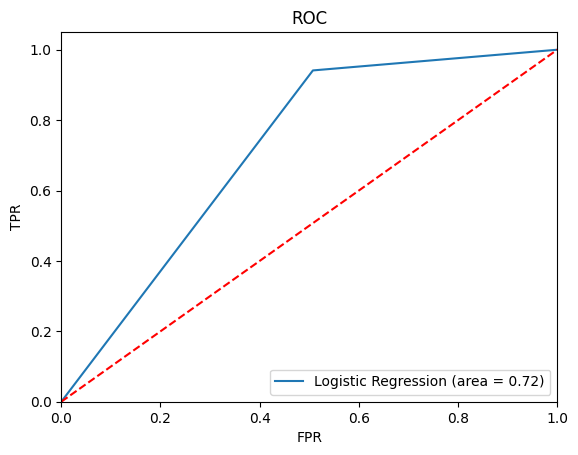

In [ ]:
logit_roc_auc=roc_auc_score(y_test,pred)
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
param_grid_gb = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.05, 0.1,0.15,0.2],
    'max_depth': [2,3, 5, 8]
}

gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5)
grid_search_gb.fit(X, y)
print(grid_search_gb.best_params_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8210


In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[109  96]
 [ 32 478]]


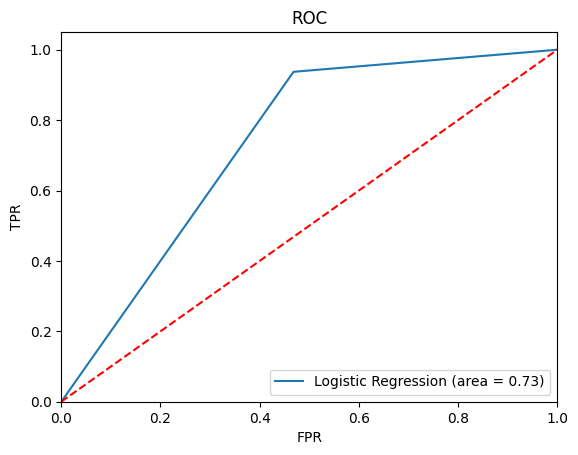

In [ ]:
logit_roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()